# 🇹🇼 DWthon 4.0 - прогнозирование банкротства фирм в Тайване (на реальных данных) 🇹🇼

Данные были собраны из Тайваньского экономического журнала за **1999-2009** годы. Банкротство определяется на основании правил ведения бизнеса **Тайваньской фондовой биржи**.

![](../images/taiwan.png)

💡 **DWthon** - это серия интенсивов для тех, кто уже знает основные инструменты **Data Science & Machine Learnig**, но хочет научиться использовать их на практике и на реальных данных или повысить уровень своих практических навыков.

**Новичкам** также можно попробовать свои силы. Даже не задумывайся, ведь Ты ничего не теряешь, а получить можно многое. Подумай таким образом - можно не все понимать и только с помощью подсказок тренировать модели ML, посмотреть, что в данных. И это уже успех для Тебя, если Ты никогда этого не делал(а) ранее. У Тебя уже будет опыт. В твоем профиле также есть масса материалов и вдохновения на которых можно учиться, и возвращаться к темам, которые были непонятны. Не сдавайся, пользуйся тем, что у Тебя есть. Если прилагать усилия - результат обязательно будет. 💪💪💪

###  💪 Целью данного интенсива является возможность выработать навыки для самостоятельного решения конкретной проблемы и весело провести время :)

**Метрикой успеха будет: F1**

Даже если Ты что-то не понимаешь в этот момент, потому что находишься в начале пути, не блокируй себя. Ребенок тоже не понимает, как работают законы физики, и все же после многих попыток ему удается опрокинуть стул. Может быть, он до сих пор не знает, почему так получилось, но у него уже есть опыт, что так можно ;)
Получи первый опыт, узнай, чего не понимаешь, и спокойно жди инициатив и материалов, с помощью которых все точки соединятся :) Естественно, что сначала не может быть все понятно. Так выглядит процесс перехода в новую область, а хорошая новость заключается в том, что  мозг уже начинает впитывать огромное количество знаний, и в конце концов точки соединятся.

### 🤓 Kaggle 
Ссылка для присоединения к конкурсу в Kaggle [ЗДЕСЬ](https://www.kaggle.com/t/7b4d7ffaee284724a32846ea7826982f).

### ✔️ Регистрация
Если у Тебя еще нет учетной записи в Kaggle, пожалуйста, [создай аккаунт](https://bit.ly/3tfXl80).

**Kaggle** - крупнейшее сообщество машинного обучения в мире (но и до недавних пор DataWorkshop были только в Польше, а теперь и в Рунете;)). Поэтому, если хочешь отнестись к этому серьезно, вдохновиться или время от времени участвовать в конкурсах, рекомендую создать  аккаунт в Kaggle.


### 👀 Правила
1. Конкурс начинается **25 ноября 2021 г.** и заканчивается, **26 ноября 2021 г. в 23:59** (по Москве).
2. Участники с результатом из ТОП 5 получат наши фирменные футболки. Места будут видны в **Public Leaderboard** на протяжении всего соревнования.
3. Набор данных разделен на две части: Public и Private. Набор данных Public содержит признаки + ответ, а набор Private только признаки. По окончании конкурса окончательный результат будет виден в **Private Leaderboard**.
4. Данные подготовлены в образовательных целях. Запрещается использовать их для каких-либо целей, кроме этого интенсива, и запрещено каким-либо образом публиковать данные (кроме своего профиля в GitHub). Решение должно быть основано только на машинном обучении (обучение модели на основе общих данных). Совмещать не нужно, сосредоточься на обучении :).
5. Нельзя формировать команды в этом соревновании. Каждый участник может добавить решение (т.е. сделать так называемый *submit*) до 5 попыток решения за один день (так что начни раньше, попыток будет больше 😉).
6. Участники, занявшие с 1-го по 5-е место, опубликуют свое решение для всех (в течение недели после победы) и поделятся им, предоставив ссылку в Slack на свой GitHub.
7. Приз будет отправлен в течение 2-3 недель.

Когда сделаешь `submit` в Kaggle, это будет рассчитанный результат. Обрати внимание, что результат рассчитывается на 50% тестовых данных, и этот результат отображается на **Public LeaderBoard** в течение всего конкурса, а по завершении конкурса, итоговый результат будет в **Private Leaderboard**.


## 💪  Начинаем!

## 📥 Импортируем нужные библиотеки

In [147]:
import pandas as pd
import xgboost as xgb
import numpy as np
np.random.seed(0)

import catboost as ctb
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report

from sklearn.model_selection import StratifiedKFold, cross_val_score
import eli5
from eli5.sklearn import PermutationImportance

import scikitplot as skplt

import matplotlib.pyplot as plt

## 🗃️  Загружаем данные
🔴 **Примечание!** Данные могут использоваться только для **образовательных целей** (также не могут быть опубликованы или переданы другим)!

In [148]:
df_train = pd.read_hdf("../input/train_taiwan.h5")
df_test = pd.read_hdf("../input/test_taiwan.h5")

df_all = pd.concat([df_train, df_test]).reset_index(drop=True)
df_all.columns = [x.replace(" ", "_").lower() for x in df_all.columns]

# создаем комбинированные признаки
#df_all["BD_PEPS4S"] = df_all["borrowing_dependency"] * df_all["persistent_eps_in_the_last_four_seasons"]
df_all["BD_NISE"] = df_all["borrowing_dependency"] * df_all["net_income_to_stockholder's_equity"]
df_all["BD_BVPSB"] = df_all["borrowing_dependency"] * df_all["book_value_per_share_(b)"]
df_all["BD_NWGR"] = df_all["borrowing_dependency"] * df_all["net_worth_growth_rate"]

df_train.shape, df_test.shape, df_all.shape


((3409, 97), (3410, 96), (6819, 100))

In [149]:
#вместо cross_val_score - функция помощник                        
def make_experiment(model, feats=None, threshold=0.5, n_splits=3, black_list=["target"], show_feats=False, show_cr=False, show_cm=False, show_pr=False, show_lc=False):
    if feats is None:
        num_feats = df_all.select_dtypes("number").columns
        feats = [x for x in num_feats if x not in black_list]

    if show_feats:
        print(feats)
        
    df_train = df_all[ df_all["target"].notnull() ]
    X_train = df_train[feats].values
    y_train = df_train["target"].values

    scores = []
    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    for train_idx, test_idx in cv.split(X_train, y_train):    

        model.fit(X_train[train_idx], y_train[train_idx])

        y_probas = model.predict_proba(X_train[test_idx])
        y_pred = (y_probas[:,1] > threshold).astype(np.int)
        #y_pred = model.predict(X_train[test_idx])

        if show_cr:
            print(classification_report(y_train[test_idx], y_pred))
        
        if show_cm:
            skplt.metrics.plot_confusion_matrix(y_train[test_idx], y_pred)#normalize=True
            
        if show_pr:
            skplt.metrics.plot_precision_recall(y_train[test_idx], y_probas)

        score = f1_score(y_train[test_idx], y_pred)
        scores.append(score)

    
    
    print("Score: ", np.mean(scores), np.std(scores))
    
    skplt.estimators.plot_learning_curve(model, X_train, y_train, cv=cv, scoring="f1", random_state=0)
    
    return eli5.show_weights(model, feature_names=feats, top=50)
    
    
def my_hist(df_all, feat_name, left_perc=1, right_perc=99):
    min_value = np.percentile( df_all[feat_name], 1)
    max_value = np.percentile( df_all[feat_name], 99)

    (
        df_all[ 
            (df_all[feat_name] > min_value) &
            (df_all[feat_name] < max_value)
        ][feat_name]
    ).hist(bins=100)
    plt.title("{}\n, left_perc={}, right_perc={}".format(feat_name, left_perc, right_perc))
    plt.show()
    
    
def save_result(filename, model, threshold=0.1):

    df_train = df_all[ df_all["target"].notnull() ]
    df_test = df_all[ df_all["target"].isnull() ].copy()

    num_feats = df_all.select_dtypes("number").columns
    feats = [x for x in num_feats if x not in ["target"]]

    
    model.fit(df_train[feats].values, df_train["target"].values)

    df_test["target"] = (model.predict_proba(df_test[feats].values)[:,1] > 0.13).astype(np.int)
    output_file = "../output/{}".format(filename)
    df_test[ ["id", "target"] ].to_csv(output_file, index=False)
    print("Saved: ", output_file)

Score:  0.4328424810352521 0.03982566431184815


Weight,Feature
0.0509,interest-bearing_debt_interest_rate
0.0426,debt_ratio%
0.0421,net_income_to_total_assets
0.0400,retained_earnings/total_assets
0.0321,non-industry_revenue_and_expenditure/revenue
0.0256,equity_to_liability
0.0248,revenue_per_person
0.0246,degree_of_financial_leverage_(dfl)
0.0218,net_value/asset
0.0217,cash_flow_to_equity


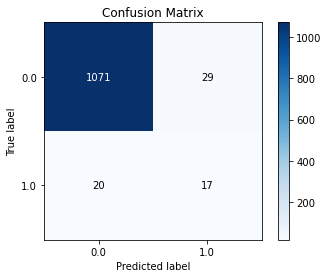

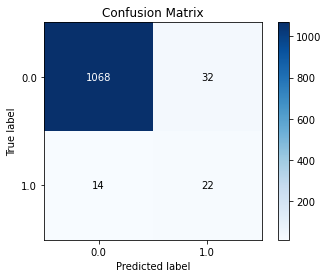

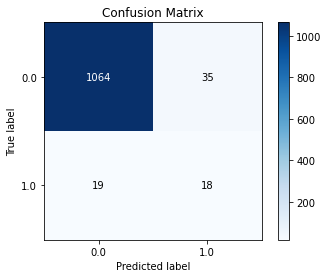

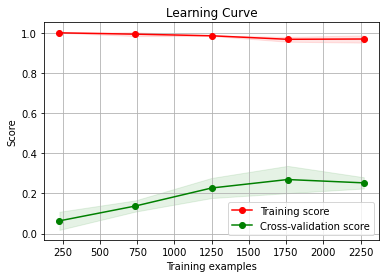

In [152]:
model = ctb.CatBoostClassifier(max_depth=5, n_estimators=100, verbose=0)
make_experiment(model, threshold=0.1, show_cm=True)

Score:  0.47571269310399744 0.00956362146584003


Weight,Feature
0.1263,continuous_profit_rate_(after_tax)
0.0877,book_value_per_share_(b)
0.0675,interest-bearing_debt_interest_rate
0.0476,borrowing_dependency
0.0435,net_worth_growth_rate
0.0366,cash_/_current_liability
0.0296,net_income_to_total_assets
0.0294,retained_earnings/total_assets
0.0238,turnover_per_share_(rmb)
0.0225,net_value/asset


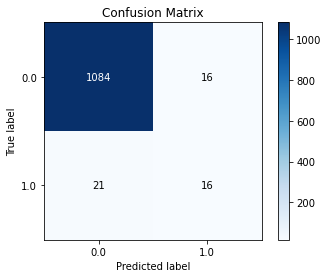

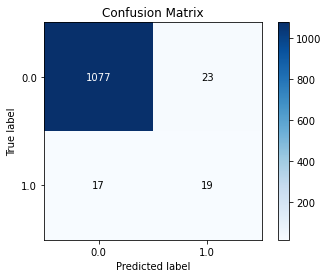

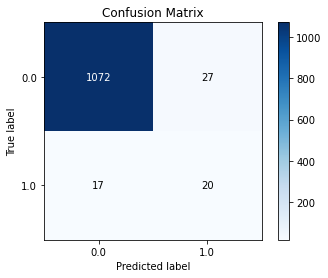

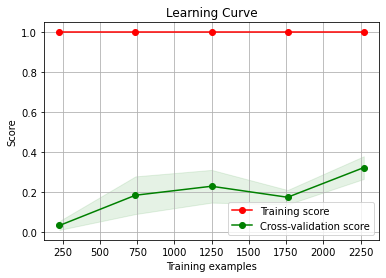

In [153]:
model = lgb.LGBMClassifier(max_depth=5, n_estimators=100)
make_experiment(model, threshold=0.1, show_cm=True)

In [157]:
model = lgb.LGBMClassifier(max_depth=5, n_estimators=100)
save_result("lgb_threshold.csv", model)

model = ctb.CatBoostClassifier(max_depth=5, n_estimators=100, verbose=0)
save_result("ctb_threshold.csv", model)

Saved:  ../output/lgb_threshold.csv
Saved:  ../output/ctb_threshold.csv


In [213]:
xgb_output = pd.read_csv("../output/xgb_threshold.csv")
lgb_output = pd.read_csv("../output/lgb_threshold.csv")
ctb_output = pd.read_csv("../output/ctb_threshold.csv")

print((0.33*xgb_output["target"] + 0.34*lgb_output["target"] + 0.33*ctb_output["target"]).value_counts())

output = pd.DataFrame()
output["id"] = xgb_output["id"]
output["target"] = ((0.33*xgb_output["target"] + 0.34*lgb_output["target"] + 0.34*ctb_output["target"]) > 0.32).astype(np.int)

print(output[(output.target > 0)].shape)

output.to_csv("../output/combo_032.csv", index=False)



0.00    3232
1.00      69
0.33      53
0.66      20
0.67      18
0.34      18
Name: target, dtype: int64
(178, 2)


## 🕵️‍ Проверяем данные

In [77]:
print(df_train.shape, df_test.shape)
df_train.info()

(3409, 97) (3410, 96)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 0 to 3408
Data columns (total 97 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   target                                                               3409 non-null   int64  
 1   ROA(C) before tax and interest before depreciation                   3409 non-null   float64
 2   ROA(A) after tax and before interest%                                3409 non-null   float64
 3   ROA(B) after tax and before interest, before depreciation            3409 non-null   float64
 4   Operating gross profit margin                                        3409 non-null   float64
 5   Already Realized gross profit margin of sales                        3409 non-null   float64
 6   Operating profit rate                                                3409 non-null

##  🤔 Определенные выводы

- у нас есть 97 столбцов, один из которых - наш ответ (т.е. столбец `target`) и `id`.
- оставив в стороне эти 2 столбца, мы можем предварительно сделать вывод, что у нас есть 95 признаков, и они являются числовыми (`float` или `int`)
- у нас нет пробелов в данных (т.е. кто-то уже поработал над ними за нас)

## 🎯 Целевая переменная
Давай потратим еще немного времени на проверку нашей целевой переменной, а именно `target`.

In [78]:
df_train["target"].value_counts()

0    3299
1     110
Name: target, dtype: int64

Наша задача - это бинарная классификация, то есть есть два возможных значения: 0 или 1.

## 🦾 Признаки

Подготовим числовые признаки.

In [126]:
df_train = df_all[ df_all["target"].notnull() ]
df_test = df_all[ df_all["target"].isnull() ].copy()

num_feats = df_all.select_dtypes("number").columns
feats = [x for x in num_feats if x not in ["target"]]


## И что теперь? 😱

Как вы видишь, у нас много возможностей 🤔. Кроме того, названия этих признаков довольно интересные 😂. Если у Тебя нет специальных знаний, они, вероятно, мало что скажут. Вот почему у меня возникла эта идея... Давай попробуем использовать ML, чтобы определить, какие столбцы заслуживают нашего внимания.

Знаешь/помнишь закон Парето? Тебе просто нужно регулярно использовать его, чтобы тратить меньше, а достигать большего.


## Подготовка `X`, `y`

У нас уже есть признаки, теперь мы можем их подготовить.

In [129]:
X_train = df_train[feats].values
y_train = df_train["target"].values

model = xgb.XGBClassifier(max_depth=5, n_estimators=100, random_state=0)
model.fit(df_train[feats].values, df_train["target"].values)

df_test["target"] = (model.predict_proba(df_test[feats].values)[:,1] > 0.13).astype(np.int)
df_test[ ["id", "target"] ].to_csv("../output/xgb_threshold_0.1.csv", index=False)


## 🎓🧠 Обучаем модель


In [131]:
#cv = StratifiedKFold(n_splits=3)
#model = xgb.XGBClassifier(max_depth=5, n_estimators=100, random_state=0)
#scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")

#np.mean(scores), np.std(scores), 0.42816-np.mean(scores)

Пока нам удалось достичь качества около `f1=40%`

## Важность признаков 🧐

In [135]:
model.fit(X_train, y_train)
eli5.show_weights(model, feature_names=feats, top=30)

Weight,Feature
0.0516,net_income_to_stockholder's_equity
0.0453,borrowing_dependency
0.0441,book_value_per_share_(b)
0.0414,net_worth_growth_rate
0.0372,working_capital_to_total_assets
0.0327,persistent_eps_in_the_last_four_seasons
0.0212,fixed_asset_turnover_times
0.0194,"roa(b)_after_tax_and_before_interest,_before_depreciation"
0.0190,continuous_profit_rate_(after_tax)
0.0176,interest-bearing_debt_interest_rate


In [139]:
# Есть еще один метод проверки (но медленнее для выполнения). Стоит запустить хотя бы несколько раз, т.к. могут быть интересные подсказки.
#perm = PermutationImportance(model, scoring='f1',random_state=0).fit(X_train, y_train)
#eli5.show_weights(perm, feature_names=feats)

Weight,Feature
0.0960 ± 0.0427,borrowing_dependency
0.0407 ± 0.0133,interest-bearing_debt_interest_rate
0.0223 ± 0.0038,net_income_to_total_assets
0.0185 ± 0.0084,average_collection_days
0.0037 ± 0.0037,equipment_rate_per_person
0.0027 ± 0.0073,continuous_profit_rate_(after_tax)
0 ± 0.0000,total_assets_growth_rate_
0 ± 0.0000,net_worth_growth_rate
0 ± 0.0000,return_on_total_assets_growth_rate
0 ± 0.0000,cash_reinvestment_%


In [140]:
eli5.show_prediction(model, X_train[100], show_feature_values=True, feature_names=feats)

## ✔️ Submit

Давай уже сделаем первый submit в Kaggle.

In [ ]:
!mkdir ../output

Прогнозируем и сохраняем результат на диск.

In [ ]:
X_test = df_test[num_feats].values
df_test["target"] = model.predict(X_test).astype("int")

df_test[ ["id", "target"] ].to_csv("../output/simple_xgb.csv", index=False)

Затем зайди в папку `output` и там найдешь файл `imple_xgb.csv`, его нужно добавить в Kaggle (сделать submit).


## Что дальше?
Это должно дать результат около **f1=39-40%**, так что еще есть над чем работать. Стоит сосредоточиться на признаках, которые появились в TOP10 или даже TOP20 (исходя из важности признаков). Вероятно, сочетание этих признаков может улучшить качество.

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

## Не знаешь, как начать анализировать данные?

💡 Ищи вдохновение в этом аккаунте! Материалы у Тебя под рукой. Загляни, например, в папки из других интенсивов, может быть, что-то вдохновит. Правда, варианты были разные, но машинное обучение в меру универсальное;) Речь идет о том, чтобы уловить определенный способ мышления и научиться экспериментировать, тогда можно переносить его на разные проблемы. 

## 🤝🗣️ Совместное обсуждение и обмен опытом 💬
Соревнование соревнованием, но во всем этом есть нечто большее, чем победа...

👉 *сотрудничество, общение, творческое и критическое мышление* - это ценности и навыки, о которых стоит заботиться

Прежде всего, речь идет о том, чтобы как можно больше учиться и поддерживать друг друга. Помни о здоровой конкуренции и взаимной помощи
🤝 

Для проведения конкурса в Kaggle мы создали отдельные каналы:
- [#dwthon_general](https://dataworkshop-ru.slack.com/archives/C02NRMNLE2D) - **общий канал**
- [#dwthon_ideas](https://dataworkshop-ru.slack.com/archives/C02N6CBK1CN) - **канал, где можно делиться мыслями и идеями**
- [#dwthon_questions](https://dataworkshop-ru.slack.com/archives/C02N6C69G3Y) - **канал, где можно задавать вопросы**

## 👉 Задания для Тебя

1. Создать учетную запись в Kaggle
2. Присоединиться к конкурсу
3. Начать анализировать имеющиеся данные :)
4. Начать тренировать модель.
5. Сделать первый submit в Kaggle.


## 👉 Следующий шаг
### Стартер № 2 💡